In [1]:
!pip install fancyimpute

In [2]:
import pandas as pd #Librería para estructura de datos. Dataframes (conjuntos de datos que me permite recorrer el archivo excel o csv)
import seaborn as sns #Libreria para visualizacion de datos
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer # Al menos una media sirve
from fancyimpute import IterativeImputer as MI #Para la imputacion multiple
import random
from sklearn.model_selection import train_test_split #sklearn para preprocesar datos y tiene modelos de machine learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #Capas dentro de un modelo neuronal
from sklearn.metrics import mean_absolute_error #Para ver cuanto se esta equivocando

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_excel("/content/drive/MyDrive/Seguidor_solar/seguidor_solar_definitivo.xlsx")
df

,fecha,hora,temperatura(C),nubosidad,velocidad_viento(m/s),direccion_viento,presion(hPa),azimut_sol,elevacion_sol
0,2023-04-01,06:00:00,7.0,Mayormente nublado,1.03,N,1030.0,85.5,-4.5
1,2023-04-01,07:00:00,8.0,Parcialmente nublado,1.03,NO,1030.0,85.3,10.5
2,2023-04-01,08:00:00,10.0,Parcialmente nublado,1.03,E,1031.0,84.8,25.4
3,2023-04-01,09:00:00,12.0,Parcialmente nublado,2.06,S,1032.0,83.7,40.3
4,2023-04-01,10:00:00,12.0,Mayormente nublado,7.20,S,1032.0,81.4,55.2
...,...,...,...,...,...,...,...,...,...
788,2023-05-31,14:00:00,12.0,Mayormente nublado,10.80,S,1032.0,311.9,55.5
789,2023-05-31,15:00:00,13.0,Mayormente nublado,7.20,S,1031.0,301.3,43.4
790,2023-05-31,16:00:00,12.0,Mayormente nublado,4.63,S,1030.0,295.9,30.2
791,2023-05-31,17:00:00,12.0,Mayormente nublado,5.66,S,1030.0,293.1,16.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha                  793 non-null    datetime64[ns]
 1   hora                   793 non-null    object        
 2   temperatura(C)         790 non-null    float64       
 3   nubosidad              791 non-null    object        
 4   velocidad_viento(m/s)  790 non-null    float64       
 5   direccion_viento       790 non-null    object        
 6   presion(hPa)           788 non-null    float64       
 7   azimut_sol             793 non-null    float64       
 8   elevacion_sol          793 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 55.9+ KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperatura(C),790.0,13.462025,3.132551,4.0,11.00,14.0,16.00,20.0
velocidad_viento(m/s),790.0,4.048329,2.547022,0.0,1.54,3.6,6.17,10.8
presion(hPa),788.0,1029.484772,2.343126,1023.0,1028.00,1030.0,1031.00,1036.0
azimut_sol,793.0,168.709710,118.239790,7.0,68.00,81.8,290.10,332.9
elevacion_sol,793.0,38.231778,25.251665,-4.5,16.50,40.3,61.60,83.3


In [7]:
df.isnull().sum()

fecha                    0
hora                     0
temperatura(C)           3
nubosidad                2
velocidad_viento(m/s)    3
direccion_viento         3
presion(hPa)             5
azimut_sol               0
elevacion_sol            0
dtype: int64

<Axes: >

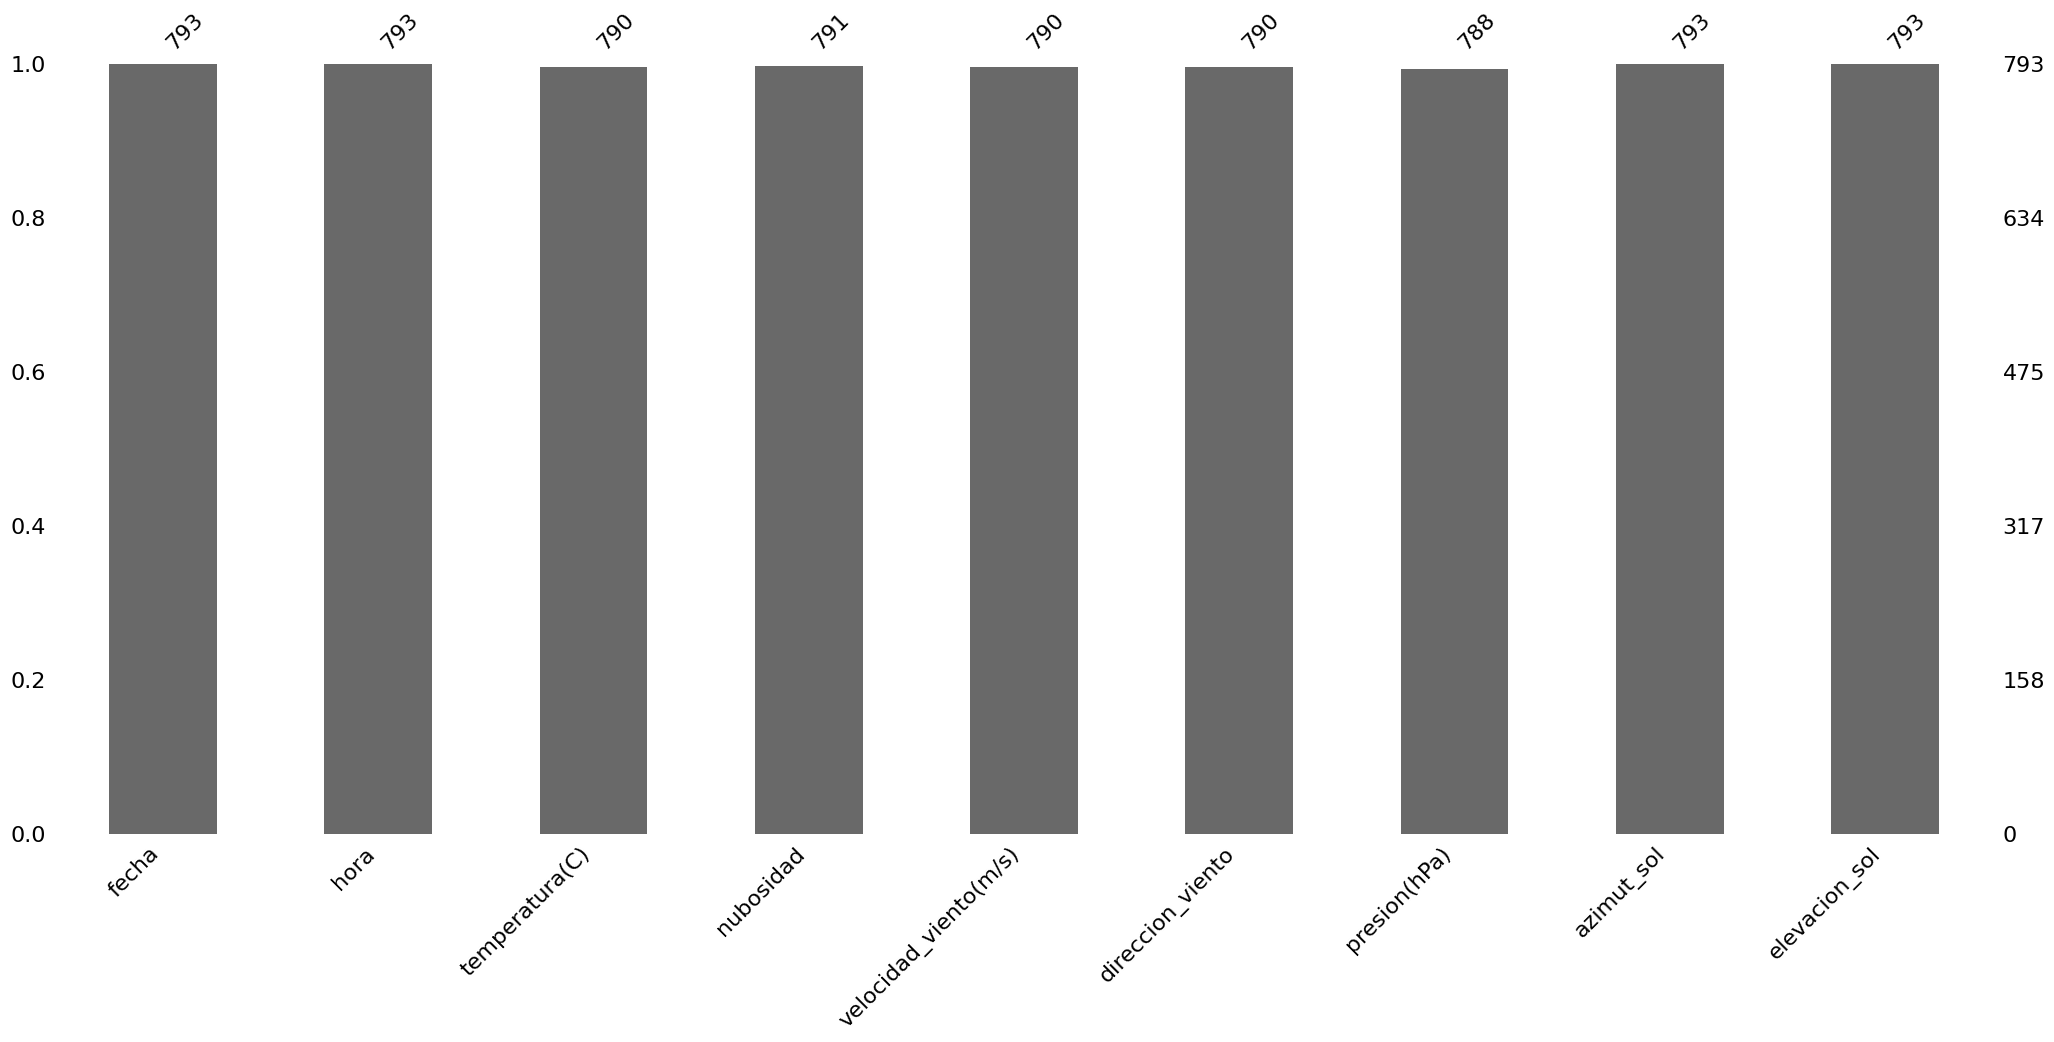

In [8]:
msno.bar(df)

<Axes: >

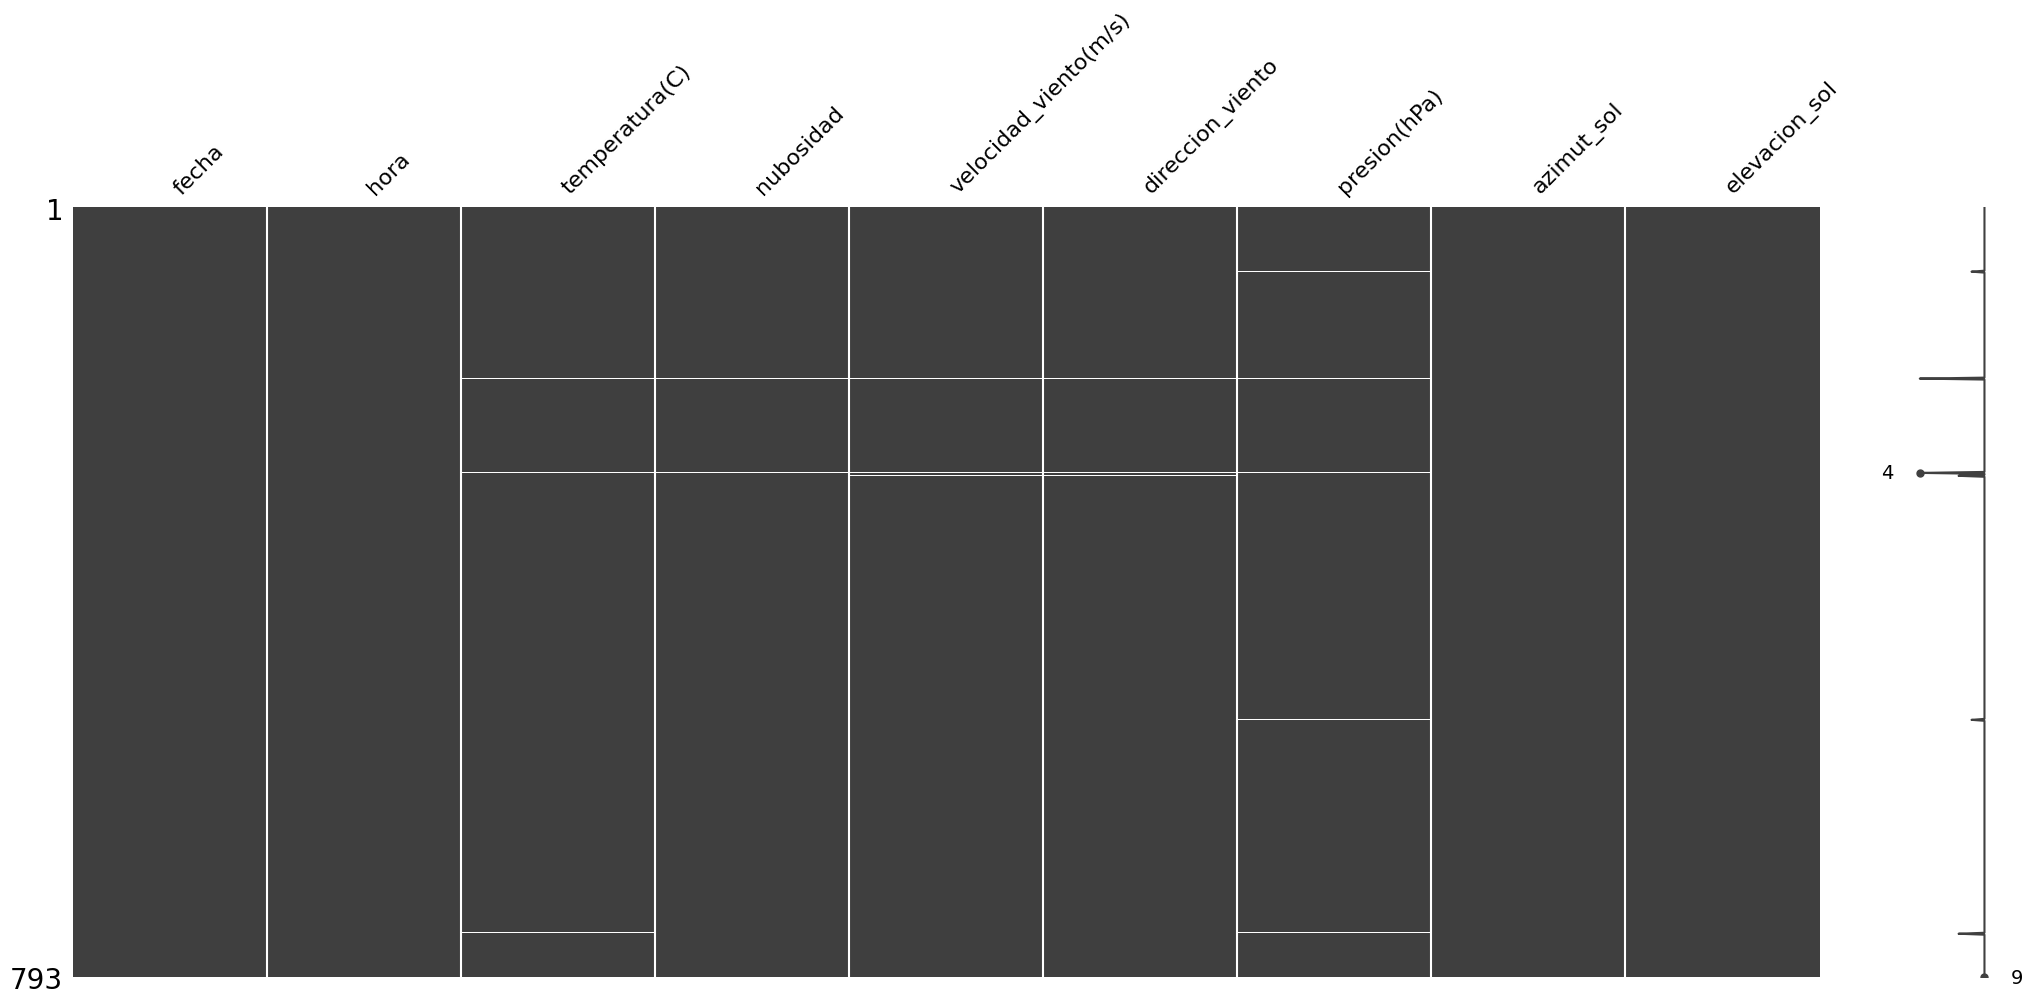

In [9]:
msno.matrix(df)

In [10]:
le = LabelEncoder()
df['nubosidad'] = le.fit_transform(df['nubosidad'])
df['direccion_viento'] = le.fit_transform(df['direccion_viento'])

In [11]:
df['dia'] = df['fecha'].apply(lambda date:date.day)
df['mes'] = df['fecha'].apply(lambda date:date.month)
df = df.drop(['fecha'], axis=1)

In [12]:
df['hora'] = df['hora'].apply(lambda date:date.hour)

In [13]:
df

,hora,temperatura(C),nubosidad,velocidad_viento(m/s),direccion_viento,presion(hPa),azimut_sol,elevacion_sol,dia,mes
0,6,7.0,1,1.03,1,1030.0,85.5,-4.5,1,4
1,7,8.0,3,1.03,4,1030.0,85.3,10.5,1,4
2,8,10.0,3,1.03,0,1031.0,84.8,25.4,1,4
3,9,12.0,3,2.06,6,1032.0,83.7,40.3,1,4
4,10,12.0,1,7.20,6,1032.0,81.4,55.2,1,4
...,...,...,...,...,...,...,...,...,...,...
788,14,12.0,1,10.80,6,1032.0,311.9,55.5,31,5
789,15,13.0,1,7.20,6,1031.0,301.3,43.4,31,5
790,16,12.0,1,4.63,6,1030.0,295.9,30.2,31,5
791,17,12.0,1,5.66,6,1030.0,293.1,16.5,31,5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hora                   793 non-null    int64  
 1   temperatura(C)         790 non-null    float64
 2   nubosidad              793 non-null    int64  
 3   velocidad_viento(m/s)  790 non-null    float64
 4   direccion_viento       793 non-null    int64  
 5   presion(hPa)           788 non-null    float64
 6   azimut_sol             793 non-null    float64
 7   elevacion_sol          793 non-null    float64
 8   dia                    793 non-null    int64  
 9   mes                    793 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 62.1 KB


<Axes: title={'center': 'Corr. Pearson Seguidor Solar'}>

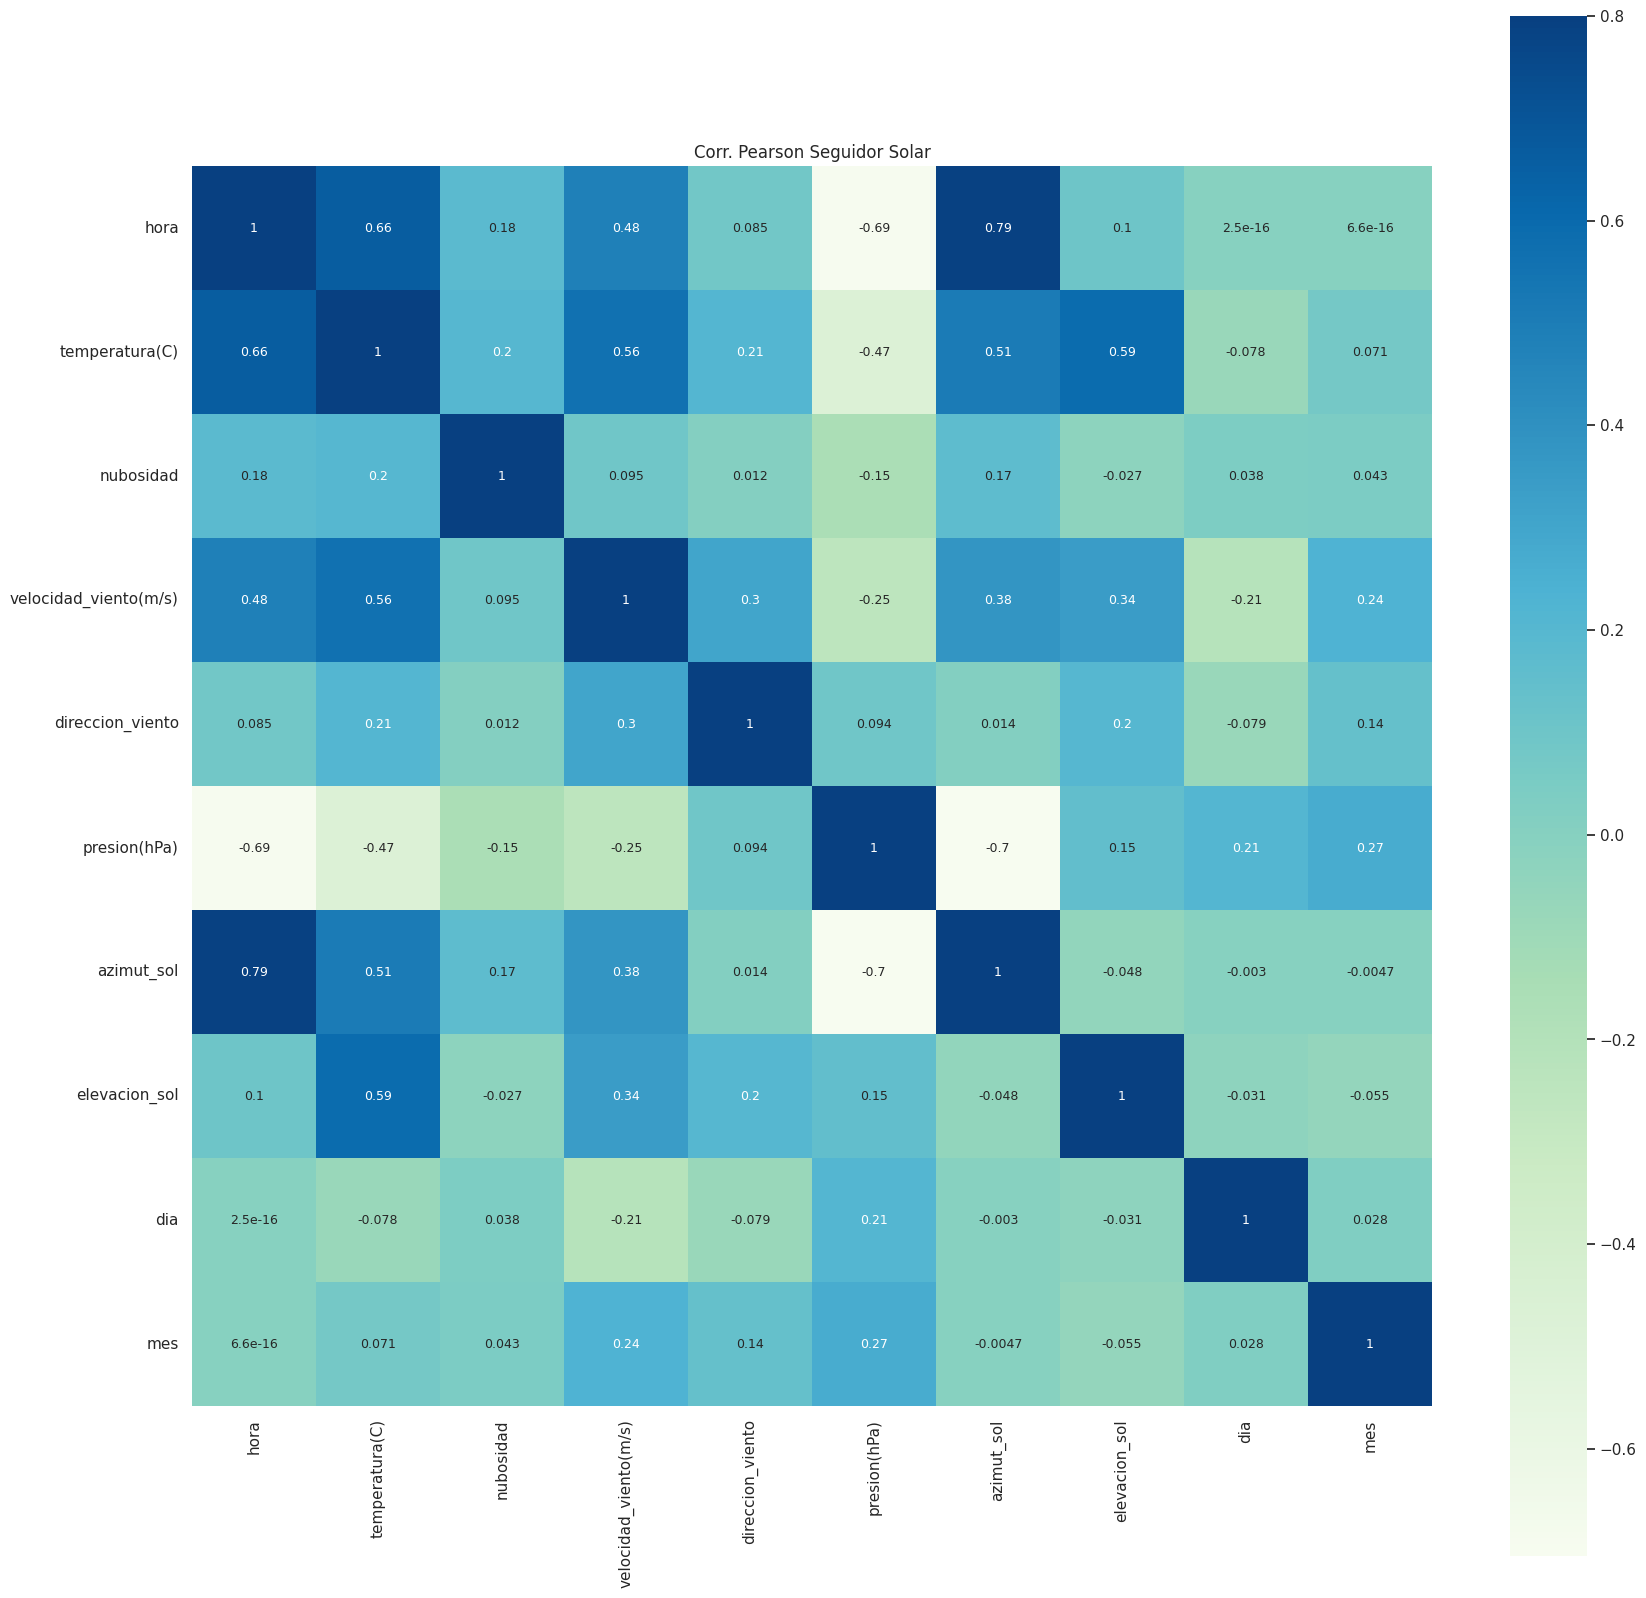

In [15]:
sns.set(style='whitegrid', font_scale=1) #Para ajustar el tamaño. Hacer un zoom sobre el mismo tamaño.
plt.figure(figsize=(20,20)) #Ajuste de Tamaño
plt.title("Corr. Pearson Seguidor Solar")
sns.heatmap(df.corr(), vmax=0.8, square=True, cmap="GnBu", linecolor='r', annot=True, annot_kws={'size':9})#Mapa de calor.

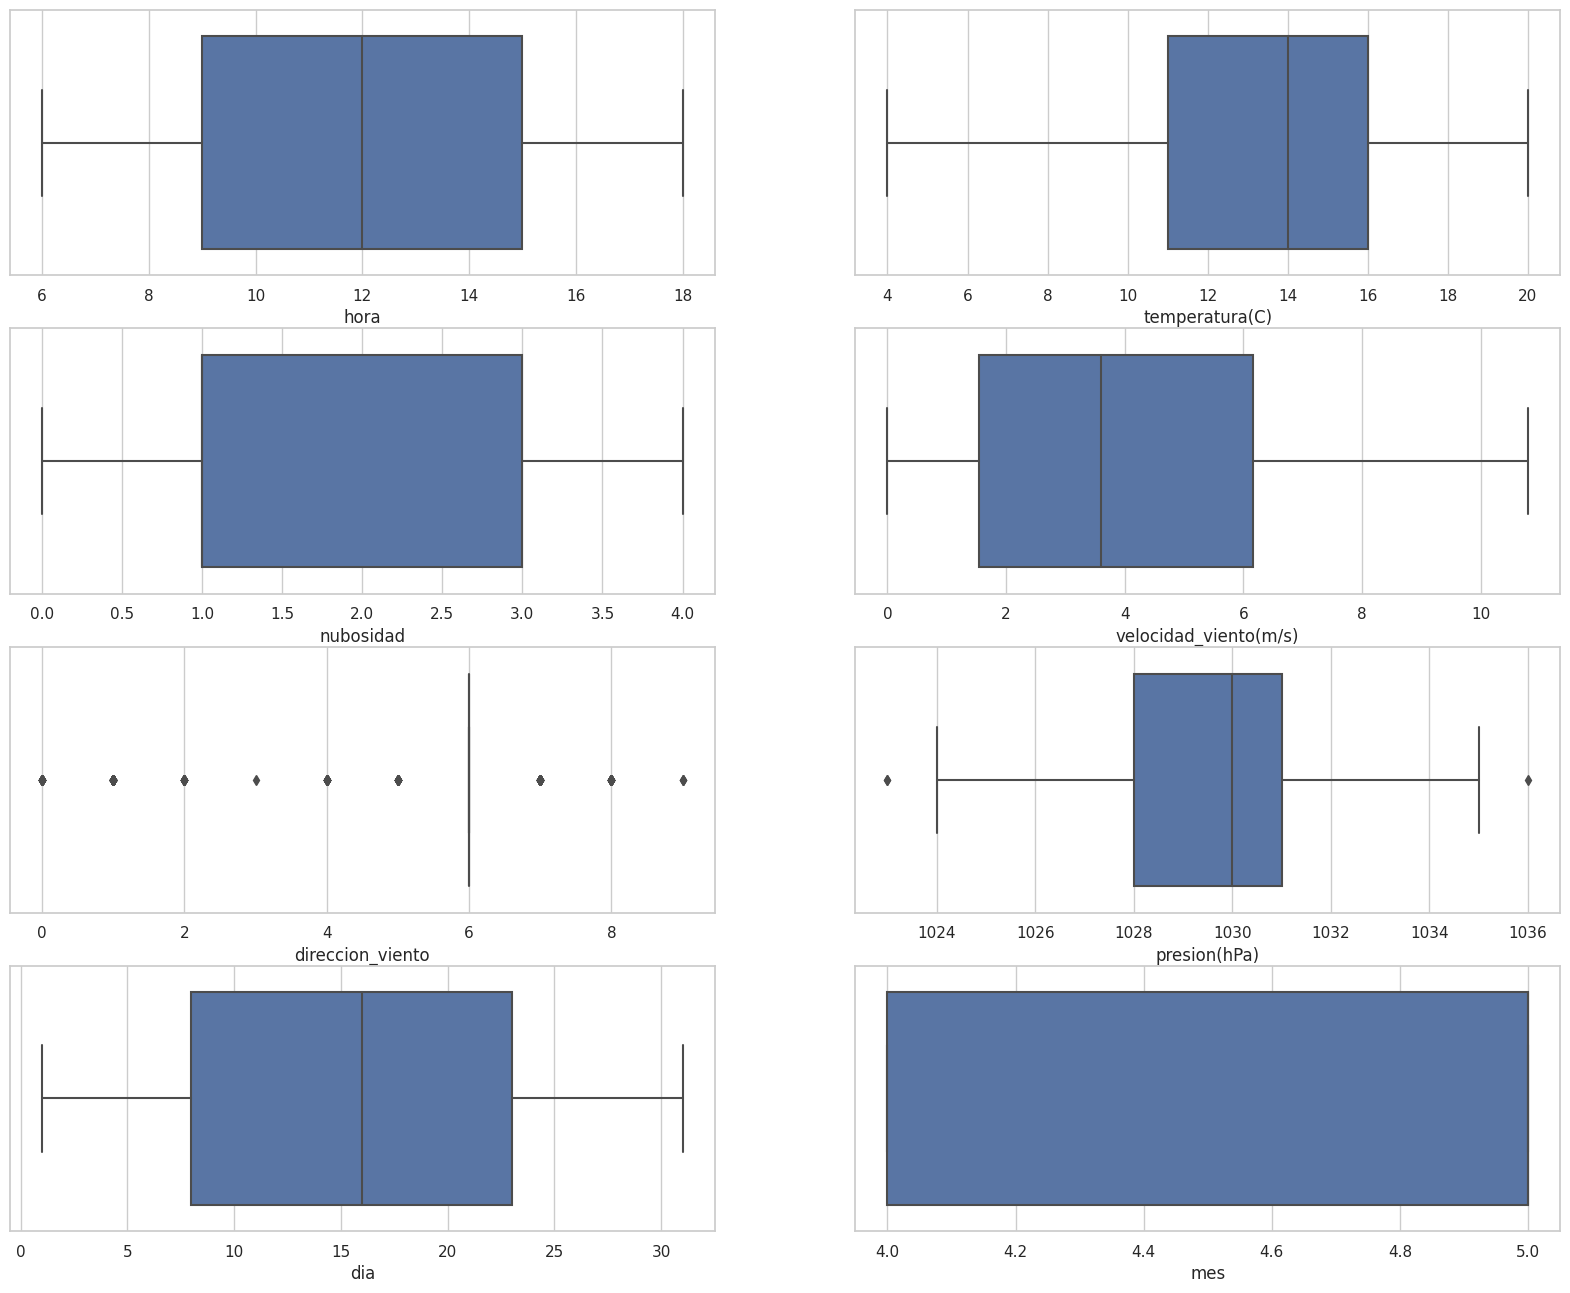

In [16]:
plt.figure(figsize=(20,20))

col = []
for column in df.columns:
  if column not in ['azimut_sol','elevacion_sol']:
    col.append(column)

for i in enumerate(col):
  plt.subplot(5,2,i[0]+1)
  sns.boxplot(x=i[1], data=df)

In [17]:
X = df.drop(['azimut_sol','elevacion_sol'], axis=1)
y = df[['azimut_sol','elevacion_sol']]

In [18]:
si = SimpleImputer()
X_si = pd.DataFrame(si.fit_transform(X))
X_si.columns = X.columns

<Axes: >

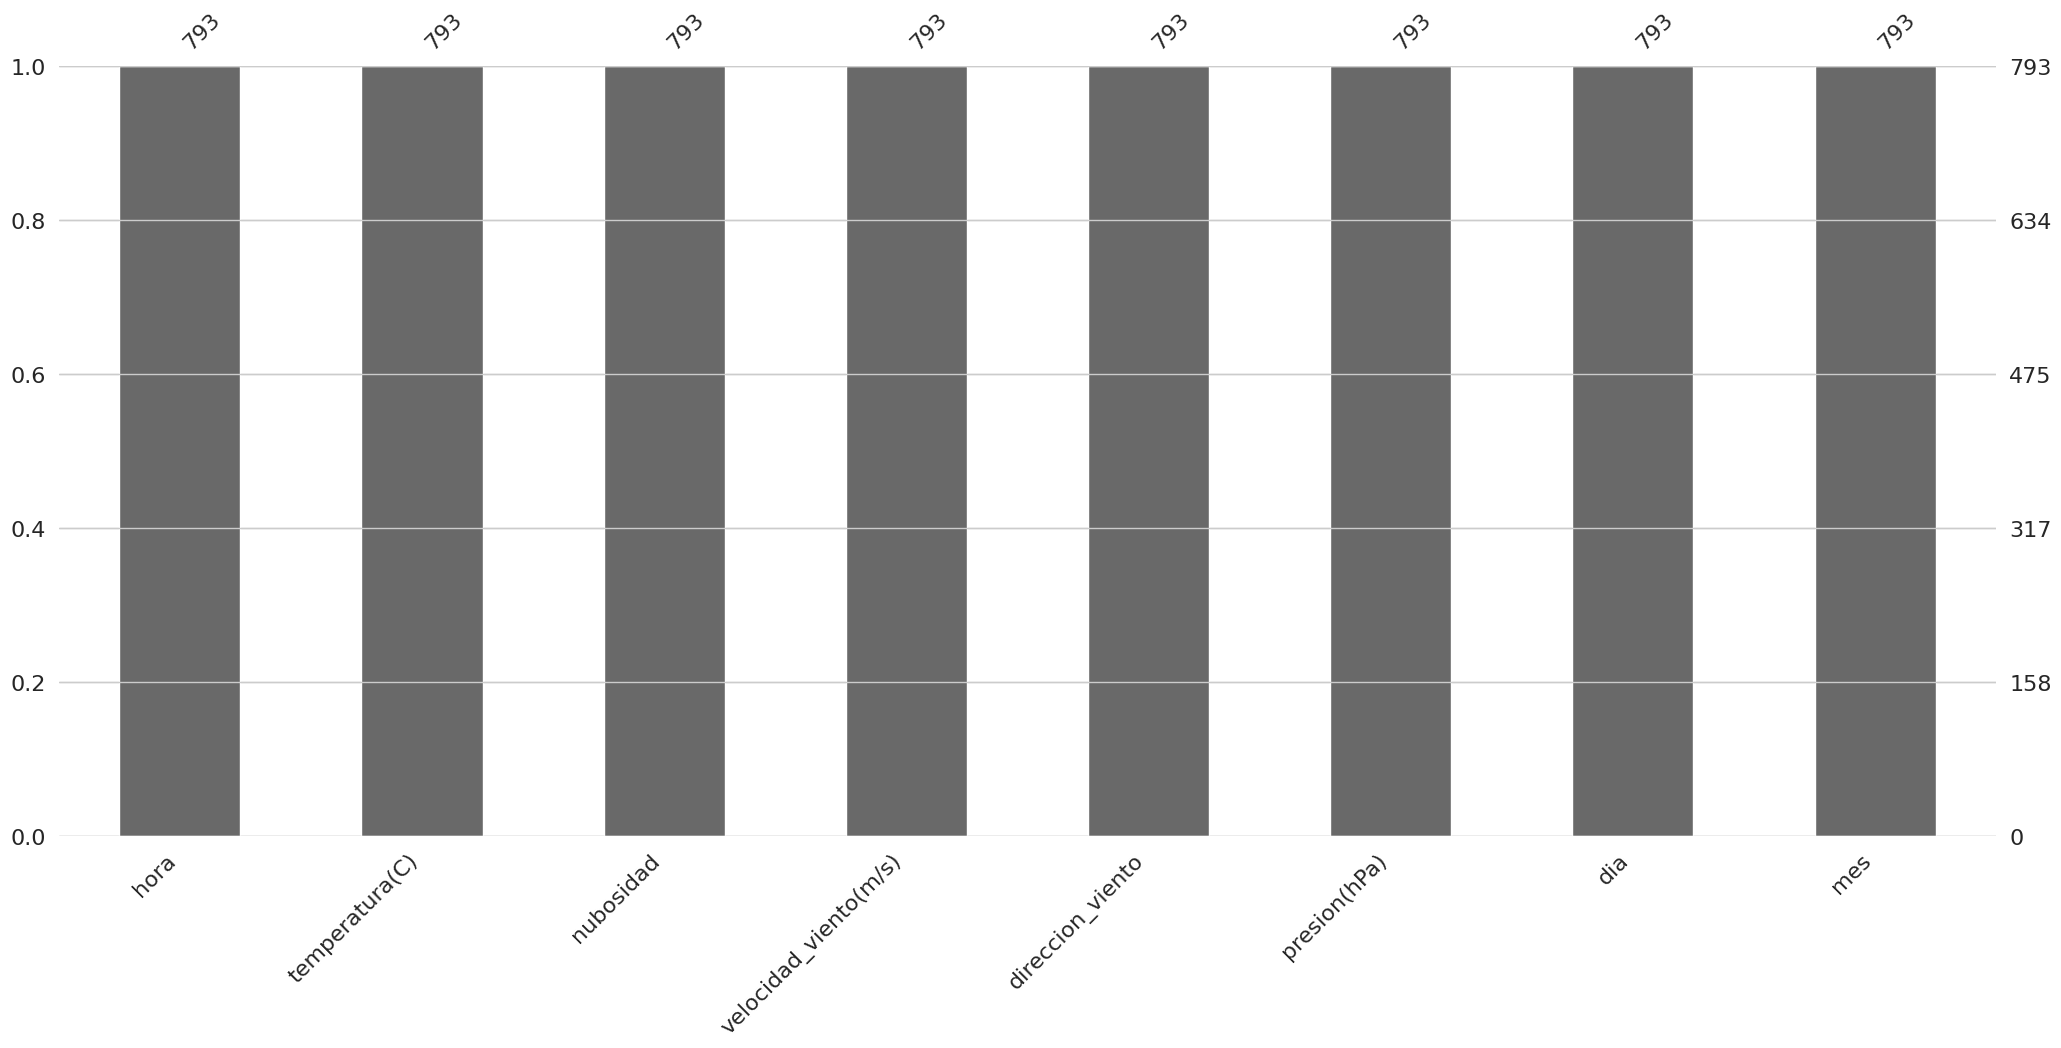

In [19]:
msno.bar(X_si)

In [20]:
X_si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hora                   793 non-null    float64
 1   temperatura(C)         793 non-null    float64
 2   nubosidad              793 non-null    float64
 3   velocidad_viento(m/s)  793 non-null    float64
 4   direccion_viento       793 non-null    float64
 5   presion(hPa)           793 non-null    float64
 6   dia                    793 non-null    float64
 7   mes                    793 non-null    float64
dtypes: float64(8)
memory usage: 49.7 KB


In [21]:
mi = MI()
X_mi = pd.DataFrame(mi.fit_transform(X))
X_mi.columns = X.columns

<Axes: >

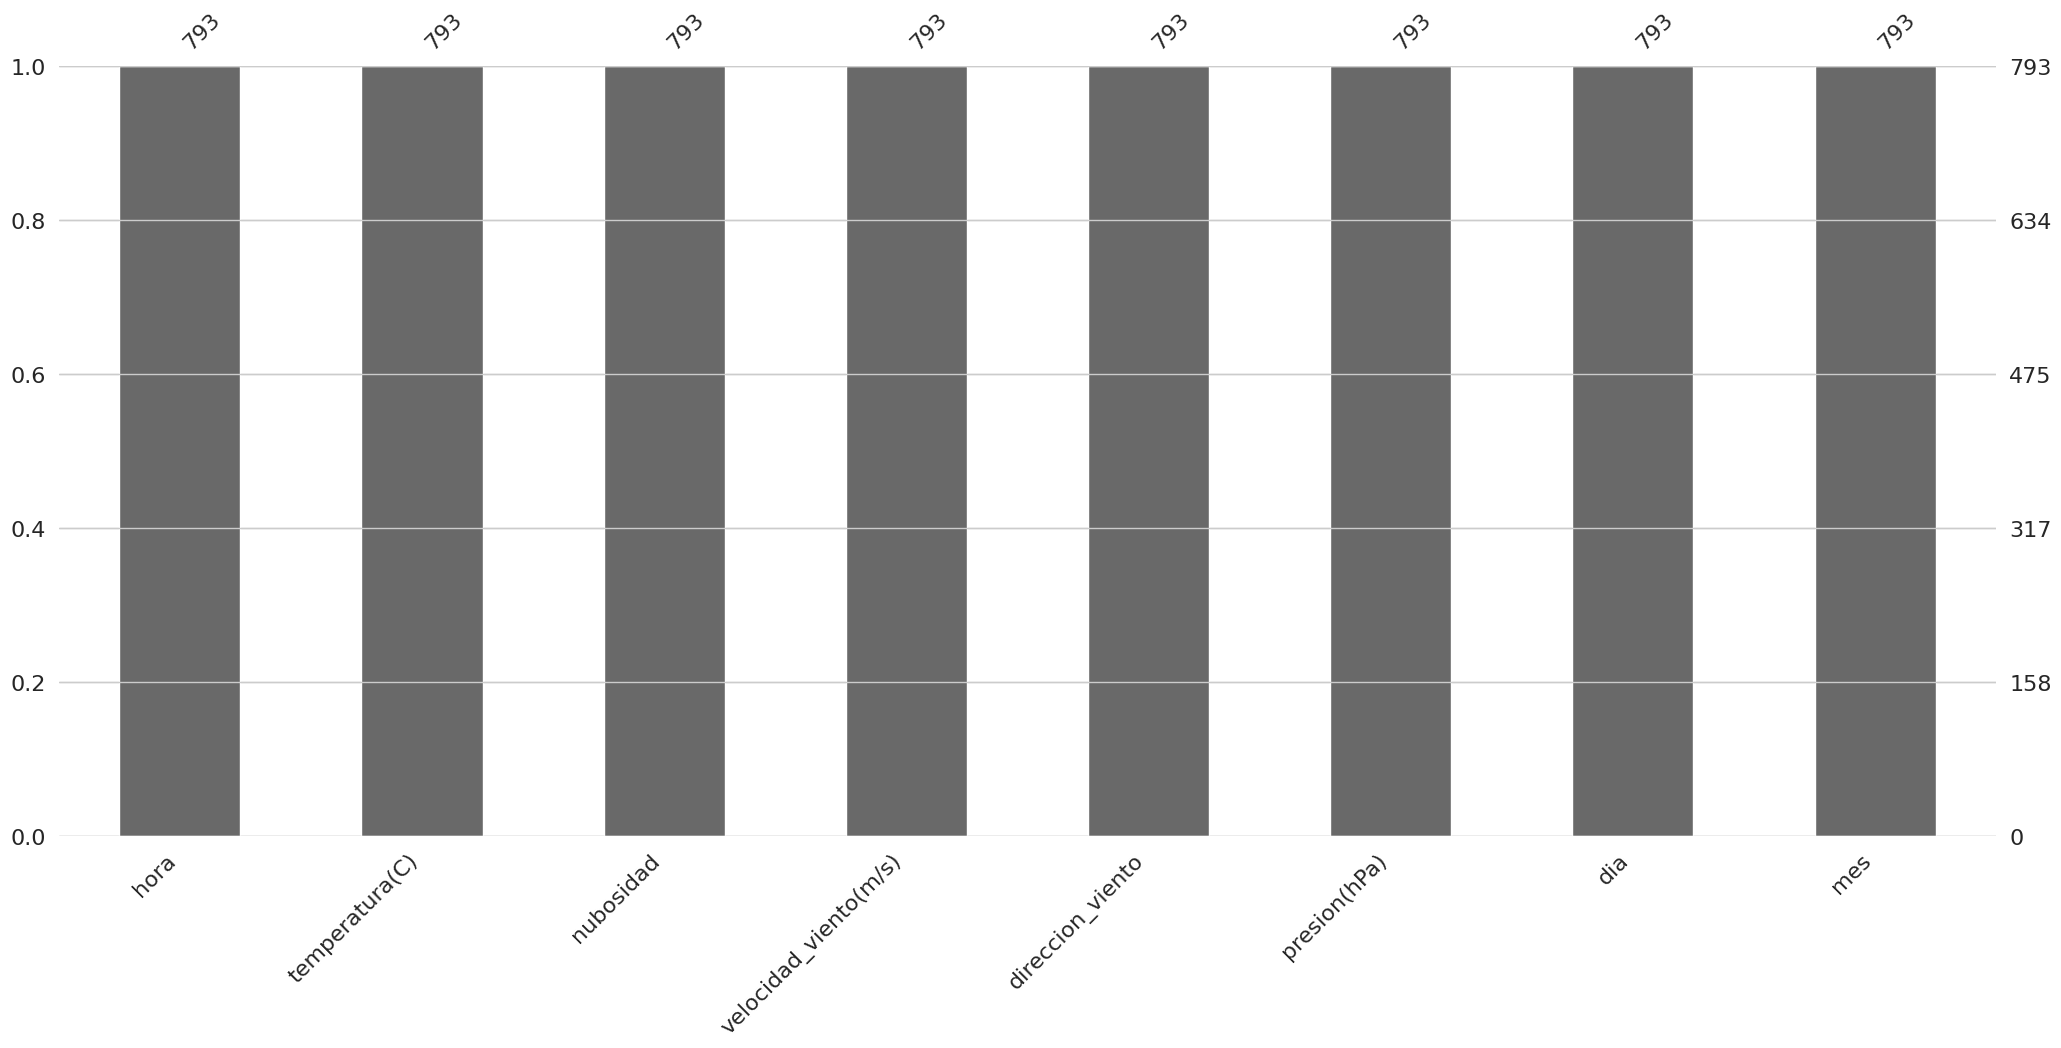

In [22]:
msno.bar(X_mi)

In [23]:
X_mi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hora                   793 non-null    float64
 1   temperatura(C)         793 non-null    float64
 2   nubosidad              793 non-null    float64
 3   velocidad_viento(m/s)  793 non-null    float64
 4   direccion_viento       793 non-null    float64
 5   presion(hPa)           793 non-null    float64
 6   dia                    793 non-null    float64
 7   mes                    793 non-null    float64
dtypes: float64(8)
memory usage: 49.7 KB


In [24]:
dfsi = pd.concat([X_si, y], axis=1)
dfmi = pd.concat([X_mi, y], axis=1)
df = pd.concat([X, y], axis=1)

In [25]:
dfsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hora                   793 non-null    float64
 1   temperatura(C)         793 non-null    float64
 2   nubosidad              793 non-null    float64
 3   velocidad_viento(m/s)  793 non-null    float64
 4   direccion_viento       793 non-null    float64
 5   presion(hPa)           793 non-null    float64
 6   dia                    793 non-null    float64
 7   mes                    793 non-null    float64
 8   azimut_sol             793 non-null    float64
 9   elevacion_sol          793 non-null    float64
dtypes: float64(10)
memory usage: 62.1 KB


In [26]:
dfmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hora                   793 non-null    float64
 1   temperatura(C)         793 non-null    float64
 2   nubosidad              793 non-null    float64
 3   velocidad_viento(m/s)  793 non-null    float64
 4   direccion_viento       793 non-null    float64
 5   presion(hPa)           793 non-null    float64
 6   dia                    793 non-null    float64
 7   mes                    793 non-null    float64
 8   azimut_sol             793 non-null    float64
 9   elevacion_sol          793 non-null    float64
dtypes: float64(10)
memory usage: 62.1 KB


<Axes: title={'center': 'Corr. Pearson Simple Imputer'}>

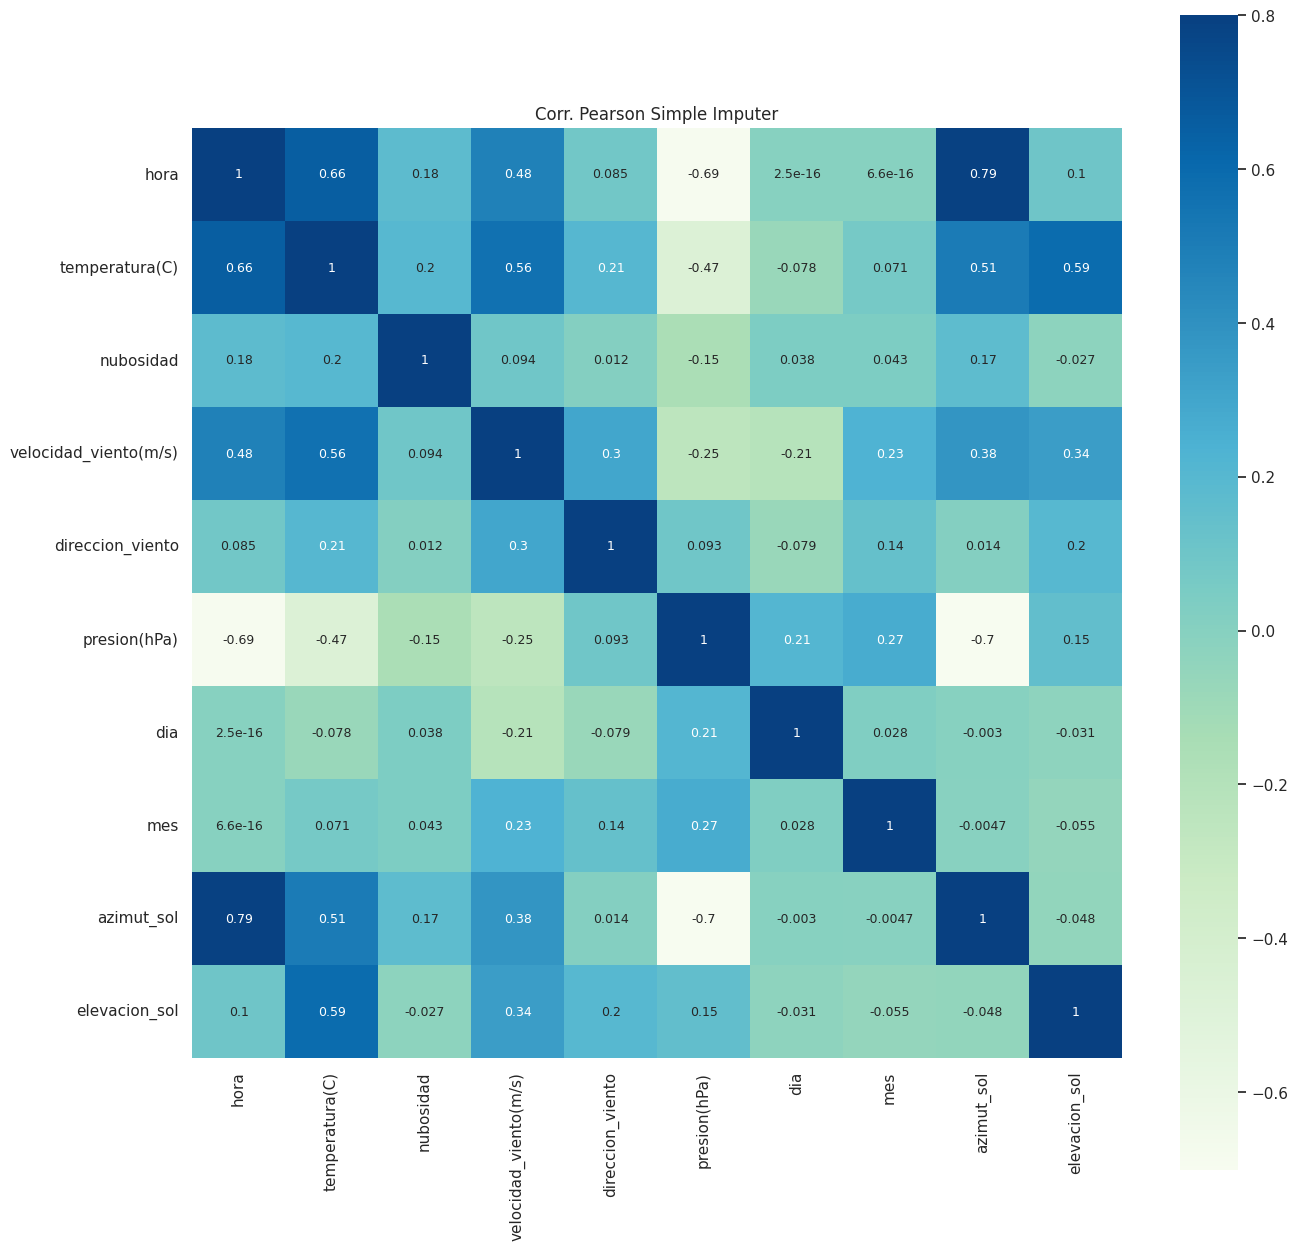

In [27]:
sns.set(style='whitegrid', font_scale=1) #Para ajustar el tamaño. Hacer un zoom sobre el mismo tamaño.
plt.figure(figsize=(15,15)) #Ajuste de Tamaño
plt.title("Corr. Pearson Simple Imputer")
sns.heatmap(dfsi.corr(), vmax=0.8, square=True, cmap="GnBu", linecolor='r', annot=True, annot_kws={'size':9})#Mapa de calor.

<Axes: title={'center': 'Corr. Pearson Iterative Imputer'}>

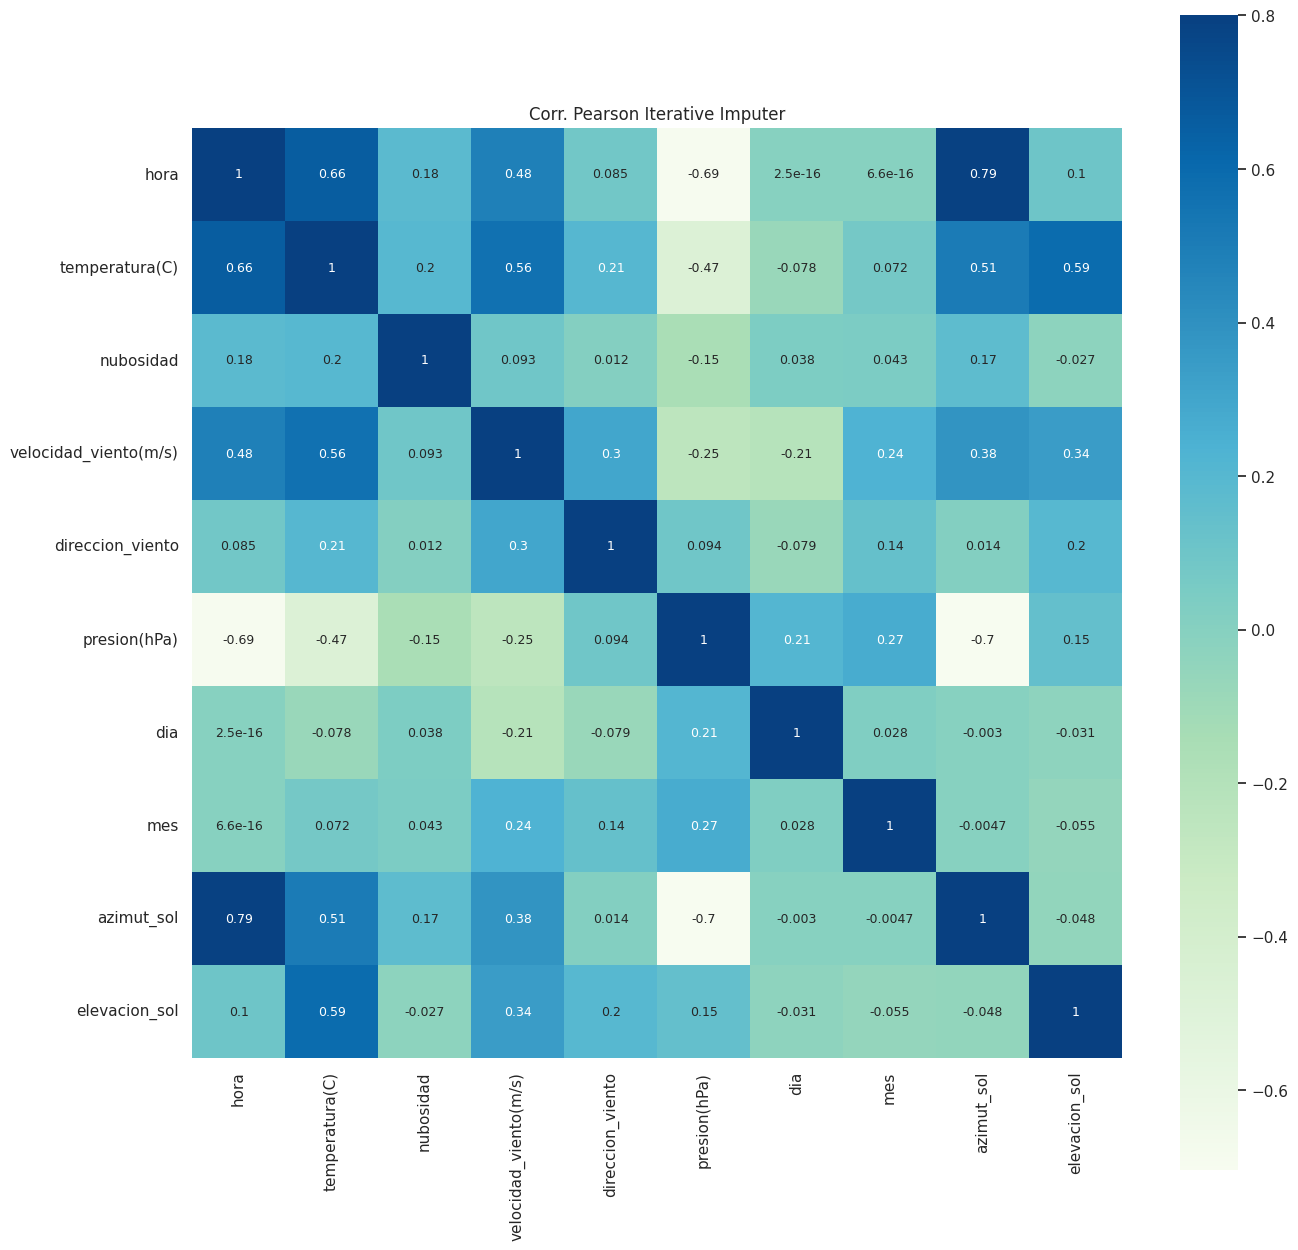

In [28]:
sns.set(style='whitegrid', font_scale=1) #Para ajustar el tamaño. Hacer un zoom sobre el mismo tamaño.
plt.figure(figsize=(15,15)) #Ajuste de Tamaño
plt.title("Corr. Pearson Iterative Imputer")
sns.heatmap(dfmi.corr(), vmax=0.8, square=True, cmap="GnBu", linecolor='r', annot=True, annot_kws={'size':9})#Mapa de calor.

<Axes: title={'center': 'Corr. Pearson sin imputar'}>

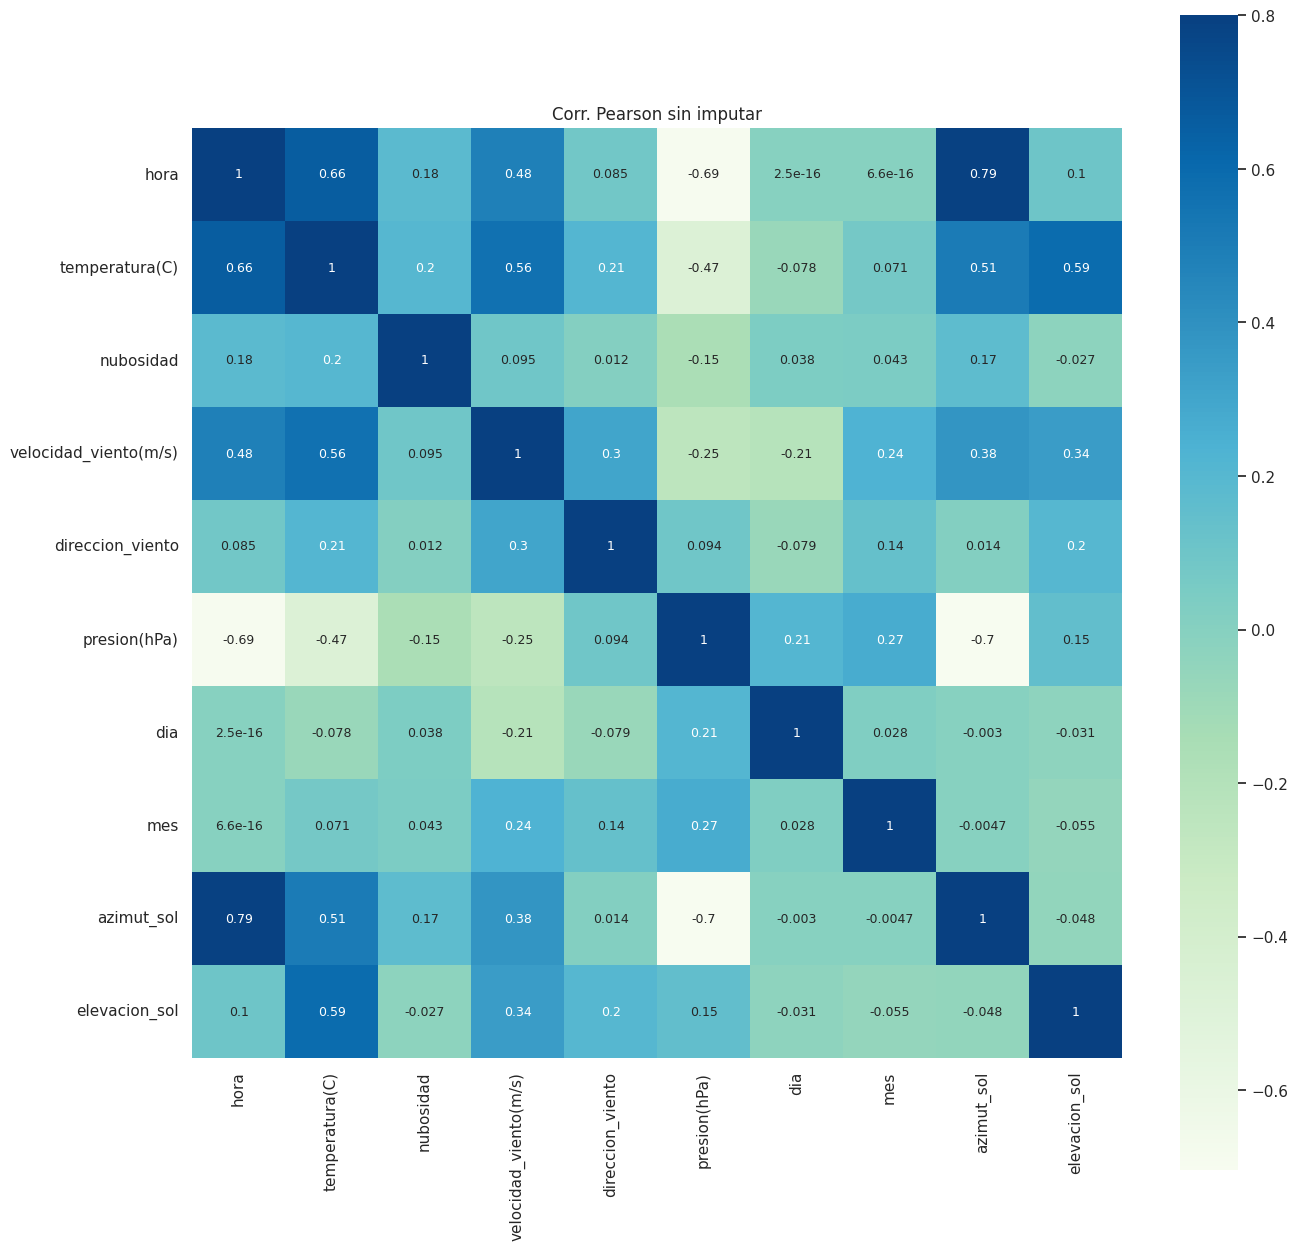

In [29]:
sns.set(style='whitegrid', font_scale=1) #Para ajustar el tamaño. Hacer un zoom sobre el mismo tamaño.
plt.figure(figsize=(15,15)) #Ajuste de Tamaño
plt.title("Corr. Pearson sin imputar")
sns.heatmap(df.corr(), vmax=0.8, square=True, cmap="GnBu", linecolor='r', annot=True, annot_kws={'size':9})#Mapa de calor.

In [30]:
df = dfsi
df

,hora,temperatura(C),nubosidad,velocidad_viento(m/s),direccion_viento,presion(hPa),dia,mes,azimut_sol,elevacion_sol
0,6.0,7.0,1.0,1.03,1.0,1030.0,1.0,4.0,85.5,-4.5
1,7.0,8.0,3.0,1.03,4.0,1030.0,1.0,4.0,85.3,10.5
2,8.0,10.0,3.0,1.03,0.0,1031.0,1.0,4.0,84.8,25.4
3,9.0,12.0,3.0,2.06,6.0,1032.0,1.0,4.0,83.7,40.3
4,10.0,12.0,1.0,7.20,6.0,1032.0,1.0,4.0,81.4,55.2
...,...,...,...,...,...,...,...,...,...,...
788,14.0,12.0,1.0,10.80,6.0,1032.0,31.0,5.0,311.9,55.5
789,15.0,13.0,1.0,7.20,6.0,1031.0,31.0,5.0,301.3,43.4
790,16.0,12.0,1.0,4.63,6.0,1030.0,31.0,5.0,295.9,30.2
791,17.0,12.0,1.0,5.66,6.0,1030.0,31.0,5.0,293.1,16.5


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hora                   793 non-null    float64
 1   temperatura(C)         793 non-null    float64
 2   nubosidad              793 non-null    float64
 3   velocidad_viento(m/s)  793 non-null    float64
 4   direccion_viento       793 non-null    float64
 5   presion(hPa)           793 non-null    float64
 6   dia                    793 non-null    float64
 7   mes                    793 non-null    float64
 8   azimut_sol             793 non-null    float64
 9   elevacion_sol          793 non-null    float64
dtypes: float64(10)
memory usage: 62.1 KB


In [32]:
df.iloc[141] #Mayormente despejado = 0 , S=6

hora                       17.00
temperatura(C)             17.00
nubosidad                   0.00
velocidad_viento(m/s)       7.72
direccion_viento            6.00
presion(hPa)             1025.00
dia                        11.00
mes                         4.00
azimut_sol                279.10
elevacion_sol              18.60
Name: 141, dtype: float64

In [33]:
df.iloc[0] #Mayormente nublado = 1 , N=1

hora                        6.00
temperatura(C)              7.00
nubosidad                   1.00
velocidad_viento(m/s)       1.03
direccion_viento            1.00
presion(hPa)             1030.00
dia                         1.00
mes                         4.00
azimut_sol                 85.50
elevacion_sol              -4.50
Name: 0, dtype: float64

In [34]:
df.iloc[62] #Nublado = 2 , NO=4

hora                       16.00
temperatura(C)             16.00
nubosidad                   2.00
velocidad_viento(m/s)       1.54
direccion_viento            4.00
presion(hPa)             1024.00
dia                         5.00
mes                         4.00
azimut_sol                277.70
elevacion_sol              33.90
Name: 62, dtype: float64

In [35]:
df.iloc[1] #Parcialmente nublado = 3 , NO=4

hora                        7.00
temperatura(C)              8.00
nubosidad                   3.00
velocidad_viento(m/s)       1.03
direccion_viento            4.00
presion(hPa)             1030.00
dia                         1.00
mes                         4.00
azimut_sol                 85.30
elevacion_sol              10.50
Name: 1, dtype: float64

In [36]:
df.iloc[2] #E=0 , Parcialmente nublado = 3

hora                        8.00
temperatura(C)             10.00
nubosidad                   3.00
velocidad_viento(m/s)       1.03
direccion_viento            0.00
presion(hPa)             1031.00
dia                         1.00
mes                         4.00
azimut_sol                 84.80
elevacion_sol              25.40
Name: 2, dtype: float64

In [37]:
df.iloc[106] #NE=2 , Mayormente nublado = 1

hora                        8.00
temperatura(C)              9.00
nubosidad                   1.00
velocidad_viento(m/s)       0.51
direccion_viento            2.00
presion(hPa)             1032.00
dia                         9.00
mes                         4.00
azimut_sol                 81.40
elevacion_sol              25.80
Name: 106, dtype: float64

In [38]:
df.iloc[703] #NINGUNA=3 , Nublado = 2

hora                        7.0
temperatura(C)              8.0
nubosidad                   2.0
velocidad_viento(m/s)       0.0
direccion_viento            3.0
presion(hPa)             1030.0
dia                        25.0
mes                         5.0
azimut_sol                 68.5
elevacion_sol              11.4
Name: 703, dtype: float64

In [39]:
df.iloc[26] #O=5 , Mayormente nublado = 1

hora                        6.00
temperatura(C)              9.00
nubosidad                   1.00
velocidad_viento(m/s)       0.51
direccion_viento            5.00
presion(hPa)             1029.00
dia                         3.00
mes                         4.00
azimut_sol                 84.70
elevacion_sol              -4.40
Name: 26, dtype: float64

In [40]:
df.iloc[3] #S=6 , Parcialmente nublado = 3

hora                        9.00
temperatura(C)             12.00
nubosidad                   3.00
velocidad_viento(m/s)       2.06
direccion_viento            6.00
presion(hPa)             1032.00
dia                         1.00
mes                         4.00
azimut_sol                 83.70
elevacion_sol              40.30
Name: 3, dtype: float64

In [41]:
df.iloc[15] #SE=7 , Mayormente nublado = 1

hora                        8.0
temperatura(C)             11.0
nubosidad                   1.0
velocidad_viento(m/s)       3.6
direccion_viento            7.0
presion(hPa)             1031.0
dia                         2.0
mes                         4.0
azimut_sol                 84.4
elevacion_sol              25.5
Name: 15, dtype: float64

In [42]:
df.iloc[40] #SO=8 , Mayormente nublado = 1

hora                        7.00
temperatura(C)             10.00
nubosidad                   1.00
velocidad_viento(m/s)       0.51
direccion_viento            8.00
presion(hPa)             1028.00
dia                         4.00
mes                         4.00
azimut_sol                 84.10
elevacion_sol              10.70
Name: 40, dtype: float64

Mayormente despejado = 0,
Mayormente nublado = 1,
Nublado = 2,
Parcialmente nublado = 3

E=0, N=1, NE=2, NINGUNA=3, NO=4, O=5, S=6, SE=7, SO=8

In [43]:
objetivo_registros = 2000
registros_adicionales = objetivo_registros - len(df)
datos_aumentados = []

for i in range(registros_adicionales):
    # Selecciona un registro existente al azar
    registro_existente = df.sample()

    # Crea una copia del registro existente
    nuevo_registro = registro_existente.copy()

    # Realiza modificaciones aleatorias en las columnas relevantes (temperatura y velocidad del viento dado que son los unicos flotantes originales)
    nuevo_registro['temperatura(C)'] += random.uniform(-0.5, 0.5)
    nuevo_registro['velocidad_viento(m/s)'] += random.uniform(-0.5, 0.5)

    # Agrega el nuevo registro a la lista de datos aumentados
    datos_aumentados.append(nuevo_registro)

df_aumentado = pd.concat([df] + datos_aumentados)

In [44]:
len(df_aumentado)

2000

In [45]:
df_aumentado

,hora,temperatura(C),nubosidad,velocidad_viento(m/s),direccion_viento,presion(hPa),dia,mes,azimut_sol,elevacion_sol
0,6.0,7.000000,1.0,1.030000,1.0,1030.0,1.0,4.0,85.5,-4.5
1,7.0,8.000000,3.0,1.030000,4.0,1030.0,1.0,4.0,85.3,10.5
2,8.0,10.000000,3.0,1.030000,0.0,1031.0,1.0,4.0,84.8,25.4
3,9.0,12.000000,3.0,2.060000,6.0,1032.0,1.0,4.0,83.7,40.3
4,10.0,12.000000,1.0,7.200000,6.0,1032.0,1.0,4.0,81.4,55.2
...,...,...,...,...,...,...,...,...,...,...
757,9.0,11.394485,3.0,3.084843,6.0,1033.0,29.0,5.0,61.6,38.4
724,15.0,15.664701,1.0,3.963815,6.0,1029.0,26.0,5.0,300.3,43.5
108,10.0,10.679452,1.0,2.852708,8.0,1033.0,9.0,4.0,76.0,55.3
628,10.0,11.702064,1.0,2.966196,8.0,1032.0,19.0,5.0,55.9,52.2


In [46]:
df_aumentado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 791
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hora                   2000 non-null   float64
 1   temperatura(C)         2000 non-null   float64
 2   nubosidad              2000 non-null   float64
 3   velocidad_viento(m/s)  2000 non-null   float64
 4   direccion_viento       2000 non-null   float64
 5   presion(hPa)           2000 non-null   float64
 6   dia                    2000 non-null   float64
 7   mes                    2000 non-null   float64
 8   azimut_sol             2000 non-null   float64
 9   elevacion_sol          2000 non-null   float64
dtypes: float64(10)
memory usage: 171.9 KB


<Axes: title={'center': 'Corr. Pearson'}>

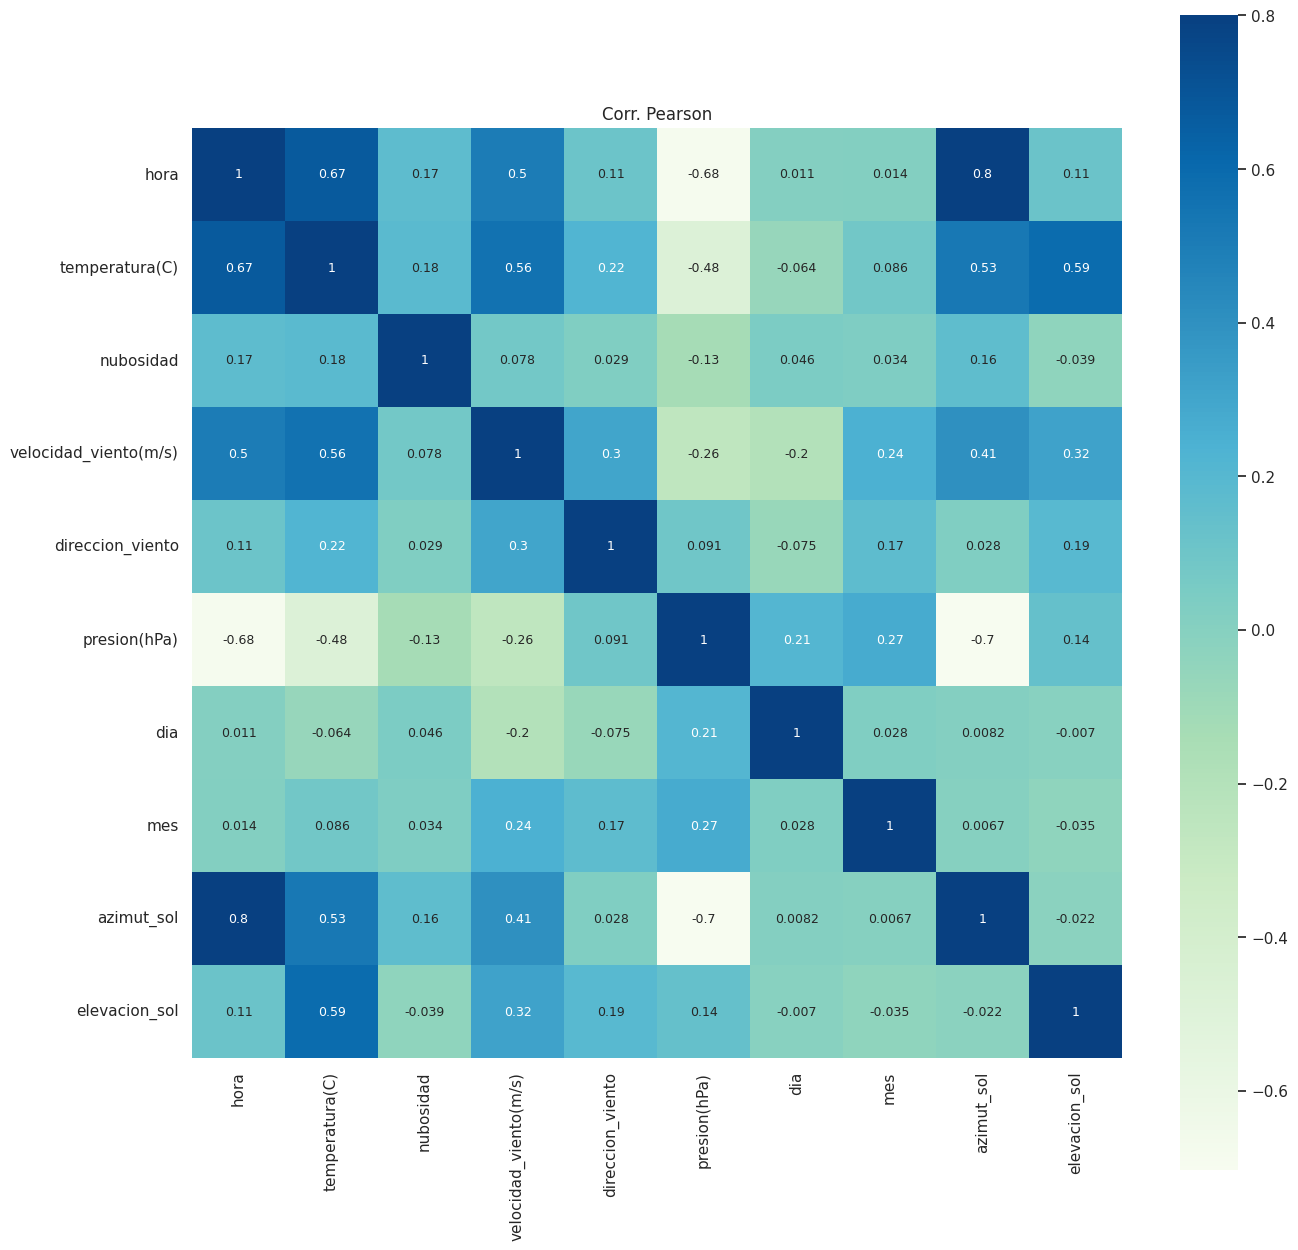

In [47]:
sns.set(style='whitegrid', font_scale=1) #Para ajustar el tamaño. Hacer un zoom sobre el mismo tamaño.
plt.figure(figsize=(15,15)) #Ajuste de Tamaño
plt.title("Corr. Pearson")
sns.heatmap(df_aumentado.corr(), vmax=0.8, square=True, cmap="GnBu", linecolor='r', annot=True, annot_kws={'size':9})#Mapa de calor.

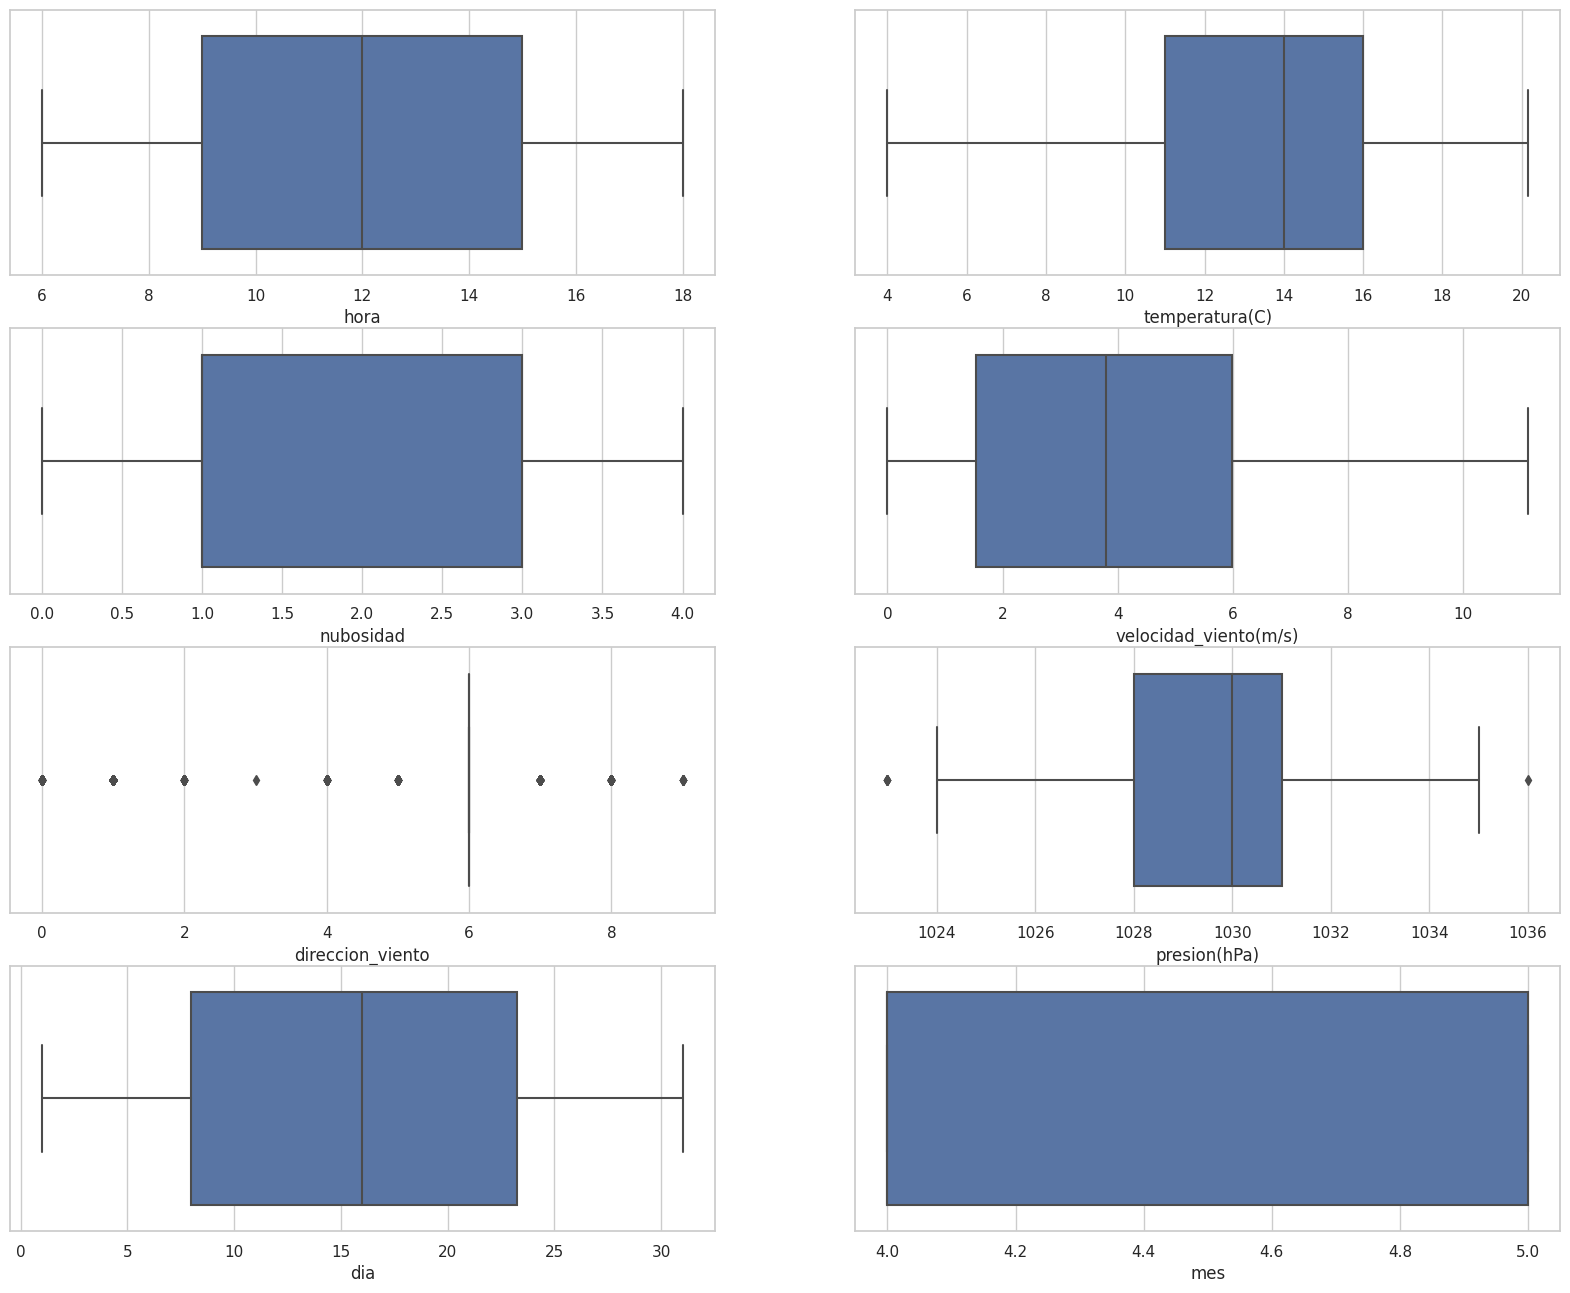

In [48]:
plt.figure(figsize=(20,20))

col = []
for column in df_aumentado.columns:
  if column not in ['azimut_sol','elevacion_sol']:
    col.append(column)

for i in enumerate(col):
  plt.subplot(5,2,i[0]+1)
  sns.boxplot(x=i[1], data=df_aumentado)

array([[<Axes: title={'center': 'hora'}>,
        <Axes: title={'center': 'temperatura(C)'}>,
        <Axes: title={'center': 'nubosidad'}>],
       [<Axes: title={'center': 'velocidad_viento(m/s)'}>,
        <Axes: title={'center': 'direccion_viento'}>,
        <Axes: title={'center': 'presion(hPa)'}>],
       [<Axes: title={'center': 'dia'}>, <Axes: title={'center': 'mes'}>,
        <Axes: title={'center': 'azimut_sol'}>],
       [<Axes: title={'center': 'elevacion_sol'}>, <Axes: >, <Axes: >]],
      dtype=object)

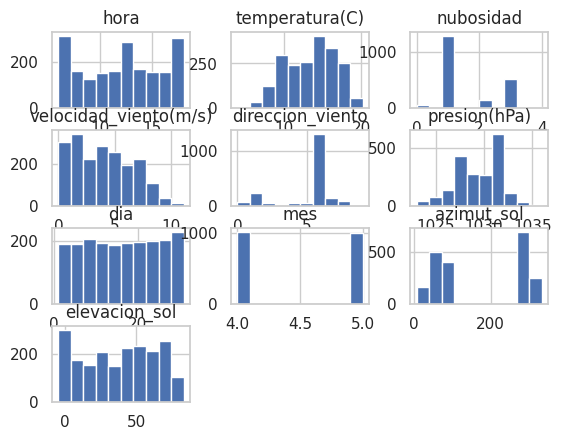

In [49]:
df_aumentado.hist()

In [50]:
X = df_aumentado.drop(['azimut_sol','elevacion_sol'], axis=1)
y = df_aumentado[['azimut_sol','elevacion_sol']]

In [51]:
scalerMinMax = MinMaxScaler()
scalerMinMax.fit(X)
#guardar el scalerMinMax con pickles
X= scalerMinMax.transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=200, test_size=0.3)

In [53]:
#ARQUITECTURA DEL MODELO
modelANN = Sequential()
modelANN.add(Dense(15,activation='relu'))
modelANN.add(Dense(10,activation='relu')) #Aqui va a aprender las caracteristicas de los patrones. Autoencoders es de redes neu que se encogen y se agrandan
#No existe una regla, solo se sabe q es menos que la anterior
modelANN.add(Dense(5,activation='relu'))
modelANN.add(Dense(2))
modelANN.compile(optimizer='adam', loss='mse')#adams o estocastico. El error medio cuadratico es la media del error en regresion, en clasificacion es accurency
#verbose en 1 es para que imprima en la consola y 0 es para que no imprima nada

In [54]:
modelANN.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), batch_size=64, epochs=650, verbose=1)

Epoch 1/650
22/22 [==============================] - 2s 18ms/step - loss: 22574.6211 - val_loss: 22330.4121
Epoch 2/650
22/22 [==============================] - 0s 5ms/step - loss: 22403.7480 - val_loss: 22098.7676
Epoch 3/650
22/22 [==============================] - 0s 5ms/step - loss: 22106.8730 - val_loss: 21686.3848
Epoch 4/650
22/22 [==============================] - 0s 5ms/step - loss: 21571.0938 - val_loss: 20969.4844
Epoch 5/650
22/22 [==============================] - 0s 6ms/step - loss: 20688.0117 - val_loss: 19839.8438
Epoch 6/650
22/22 [==============================] - 0s 5ms/step - loss: 19358.3203 - val_loss: 18215.5605
Epoch 7/650
22/22 [==============================] - 0s 6ms/step - loss: 17517.4844 - val_loss: 16061.5869
Epoch 8/650
22/22 [==============================] - 0s 5ms/step - loss: 15206.9717 - val_loss: 13504.3086
Epoch 9/650
22/22 [==============================] - 0s 5ms/step - loss: 12582.4639 - val_loss: 10850.9951
Epoch 10/650
22/22 [================

In [55]:
#guardar modelANN en .h5

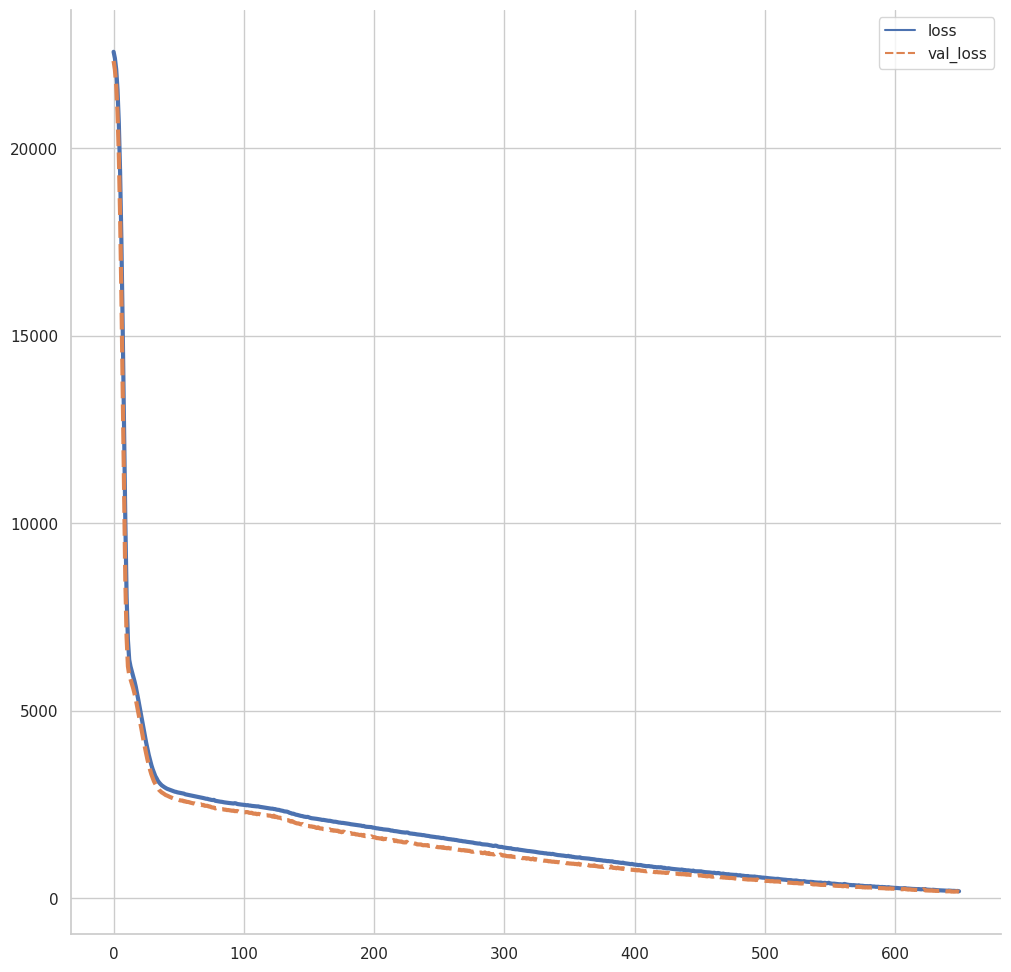

In [56]:
loss = pd.DataFrame(modelANN.history.history)#graficamos la perdida que significa cómo se va ajustando para aprender
plt.figure(figsize=(12,12))
sns.lineplot(data= loss, lw=3)
sns.despine()

In [57]:
#cargar archivo scaler y h5
#transformar data
#escalar la entrada
#predecir

In [58]:
y_pred_Test = modelANN.predict(X_test)
error_absolute = mean_absolute_error(y_test, y_pred_Test)
print(error_absolute)

19/19 [==============================] - 0s 1ms/step
7.391947685827808


In [59]:
y_pred_train = modelANN.predict(X_train)
error_absolute_train = mean_absolute_error(y_train, y_pred_train)
print(error_absolute_train)

44/44 [==============================] - 0s 2ms/step
7.478029473372881


Ejemplo prediccion a las 11am

In [60]:
dato1 = df_aumentado.drop(['azimut_sol','elevacion_sol'], axis=1).iloc[10]
azi_y_ele = df_aumentado.iloc[10][['azimut_sol','elevacion_sol']]

In [61]:
azi_y_ele

azimut_sol       275.9
elevacion_sol     34.3
Name: 10, dtype: float64

In [62]:
dato1

hora                       16.00
temperatura(C)             15.00
nubosidad                   1.00
velocidad_viento(m/s)       8.75
direccion_viento            6.00
presion(hPa)             1026.00
dia                         1.00
mes                         4.00
Name: 10, dtype: float64

In [63]:
dato1.info()

<class 'pandas.core.series.Series'>
Index: 8 entries, hora to mes
Series name: 10
Non-Null Count  Dtype  
--------------  -----  
8 non-null      float64
dtypes: float64(1)
memory usage: 428.0+ bytes


In [64]:
dato1_escalado = scalerMinMax.transform(dato1.values.reshape(-1,8))
dato1_escalado

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.83333333, 0.68062948, 0.25      , 0.78636044, 0.66666667,
        0.23076923, 0.        , 0.        ]])

In [65]:
azi_y_ele_predicho = modelANN.predict(dato1_escalado)[0]

1/1 [==============================] - 0s 20ms/step


In [66]:
azi_y_ele_predicho

array([282.71152 ,  35.991207], dtype=float32)

In [67]:
azimut_predicho = azi_y_ele_predicho[0]
elevacion_predicha = azi_y_ele_predicho[1]

In [68]:
azimut_predicho

282.71152

In [69]:
elevacion_predicha

35.991207

Con dato perzonalizado

In [70]:
fila_personalizada = [16, 15, 1, 8.75, 6, 1026, 1, 4]
type(fila_personalizada)

list

In [71]:
type(fila_personalizada[4])

int

In [72]:
azi_y_ele

azimut_sol       275.9
elevacion_sol     34.3
Name: 10, dtype: float64

In [73]:
fila_personalizada_escalado = scalerMinMax.transform(dato1.values.reshape(-1,8))
fila_personalizada_escalado

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.83333333, 0.68062948, 0.25      , 0.78636044, 0.66666667,
        0.23076923, 0.        , 0.        ]])

In [74]:
azi_y_ele_fila_personalizada_predicho = modelANN.predict(fila_personalizada_escalado)[0]
azi_y_ele_fila_personalizada_predicho

1/1 [==============================] - 0s 21ms/step


array([282.71152 ,  35.991207], dtype=float32)

Con dato modificado a lo actual

In [75]:
fila_creada = [16, 15, 1, 8.75, 6, 1026, 27, 6]

In [76]:
azi_y_ele

azimut_sol       275.9
elevacion_sol     34.3
Name: 10, dtype: float64

In [77]:
fila_creada = scalerMinMax.transform(dato1.values.reshape(-1,8))
fila_creada

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.83333333, 0.68062948, 0.25      , 0.78636044, 0.66666667,
        0.23076923, 0.        , 0.        ]])

In [78]:
azi_y_ele_fila_creado_predicho = modelANN.predict(fila_personalizada_escalado)[0]
azi_y_ele_fila_creado_predicho

1/1 [==============================] - 0s 21ms/step


array([282.71152 ,  35.991207], dtype=float32)

Guardar excalado con extensión pkl

In [88]:
import joblib

In [86]:
print(scalerMinMax.scale_)

[0.08333333 0.06187541 0.25       0.08986976 0.11111111 0.07692308
 0.03333333 1.        ]


In [87]:
print(scalerMinMax.min_)

[-5.00000000e-01 -2.47501629e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.86923077e+01 -3.33333333e-02 -4.00000000e+00]


In [89]:
file_name = "escaladoSeguidor.pkl"
joblib.dump(scalerMinMax, file_name)

['escaladoSeguidor.pkl']

Guardar el modelo ANN

In [85]:
modelANN.save("modelANNseguidor.h5")